# **DATA PREPROCESSING BASED ON EDA INSIGHTS**

This notebook implements preprocessing steps based on the comprehensive EDA findings and recommendations. We'll follow the evidence-based approach from the EDA report to ensure our preprocessing aligns with the data patterns discovered.
Based on the EDA report, we will:

1. **Handle Skewed Variables** - Log-transform `CoapplicantIncome`,  `ApplicantIncome `

2. **Feature Engineering**:

Feature Engineering Suggestions:
- Total_Income = ApplicantIncome + CoapplicantIncome
- EMI = LoanAmount / Loan_Amount_Term
- Income_to_Loan_Ratio = Total_Income / LoanAmount

3. **Feature Selection** - Keep high-signal features
4. **Scaling** - StandardScaler for distance-based models


 Final Preprocessing Pipeline (Suggested Order)

1. Feature engineering (TotalIncome, EMI, Ratios).

2. Apply log transformations on skewed variables.

3. Encode categorical variables (Label + One-Hot).

4. Split data into features and target/ Perform feature selection .

5. Address class imbalance (SMOTE or class weights).

6. Feature Scailing (RobustScaler).

7. Feature Important Analysis






#### **1. Import Libraries and Load Data**

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import warnings
warnings.filterwarnings('ignore')

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Statistical libraries
from scipy import stats
from scipy.stats import zscore, skew

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
df = pd.read_csv("cleaned_data.csv")
# df.set_index("")

In [3]:
df_copy = df.copy()


#### **2. EDA-Based Data Quality Assessment**

#### **3. Feature Engineering**

Feature Engineering Suggestions:
- Total_Income = ApplicantIncome + CoapplicantIncome
- EMI = LoanAmount / Loan_Amount_Term
- Income_Category
- Loan_Amount_Term_ in_years= Loan_Amount_Term / 12
- Has coaplicant

In [4]:
#creating column for total income  = ApplicantIncome + CoapplicantIncome
df["Total_income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [5]:
#creating column for Equated Monthly Installment(EMI) = LoanAmount / Loan_Amount_Term
df["EMI"] = df["LoanAmount"] / df["Loan_Amount_Term"]
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,EMI
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,0.355556
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.355556
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.183333
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.333333
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.391667


In [6]:
#converting the loan amount term in months to year
df["Loan_Amount_Term_ in_year"] = df["Loan_Amount_Term"] / 12

In [7]:
def income_category(income):
    """ Categorize income """
    if income <= 1500:
        return "Low"
    elif (income > 1500) and (income <= 5000):
        return "Medium"
    elif income > 5000:
        return "High"
    else:
        return "Very High"


In [8]:
# creates income category
df["Income_Category"] = df["Total_income"].apply(income_category)
df["Income_Category"]

0        High
1        High
2      Medium
3      Medium
4        High
        ...  
609    Medium
610    Medium
611      High
612      High
613    Medium
Name: Income_Category, Length: 614, dtype: object

In [9]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,EMI,Loan_Amount_Term_ in_year,Income_Category
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,0.355556,30.0,High
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.355556,30.0,High
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.183333,30.0,Medium
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.333333,30.0,Medium
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.391667,30.0,High


In [10]:
df.Married.unique()

array(['No', 'Yes'], dtype=object)

| Categorical | Numeric   | Meaning     |
| ----------- | ----------| ------------|
| Yes         | 1         | Married     |
| No          | 0         | Not Married |

In [11]:
def map_married_category(x):
    """ Confirms if the loan applicant has a coapplicant"""
    if x == 'Yes':
        return '1'
    else:
        return '0'
# Lets apply the function
df['Has_Coapplicant'] = df['Married'].apply(map_married_category)

In [12]:
df['Has_Coapplicant']

0      0
1      1
2      1
3      1
4      0
      ..
609    0
610    1
611    1
612    1
613    0
Name: Has_Coapplicant, Length: 614, dtype: object

In [13]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_income', 'EMI', 'Loan_Amount_Term_ in_year', 'Income_Category',
       'Has_Coapplicant'],
      dtype='object')

In [14]:
print(df["Total_income"].skew())
print(df["EMI"].skew())

5.633448514884535
9.9607008985074


#### **4. Log-Transform Skewed Variables (EDA Recommendation)**

In [15]:
def handle_skewed_data(df):
    """ Handles the skewness of the data"""
    skewed_column = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Total_income','EMI']
    for col in skewed_column:
            # Check if variable has zero or negative values
            min_val = df[col].min()
            if min_val <= 0:
                # Use log1p for variables with zeros
                df[f"{col}_log"] = np.log1p(df[col])
                print(f"{col}: Applied  loglp Transformation(had {min_val:.3f} minimum value)")
            else:
            # Use log for positive values only
                df[f"{col}_log"] = np.log(df[col])
                print(f" {col}: Applied log transformation")

            # Check skewness before and after
            original_skew = skew(df[col])
            transformed_skew = skew(df[f'{col}_log'])
            print(f"Original skewness: {original_skew:.3f} → Transformed skewness: {transformed_skew:.3f}")
    return df

In [16]:
handle_skewed_data(df)

 ApplicantIncome: Applied log transformation
Original skewness: 6.524 → Transformed skewness: 0.478
CoapplicantIncome: Applied  loglp Transformation(had 0.000 minimum value)
Original skewness: 7.473 → Transformed skewness: -0.173
 LoanAmount: Applied log transformation
Original skewness: 2.736 → Transformed skewness: -0.195
 Total_income: Applied log transformation
Original skewness: 5.620 → Transformed skewness: 1.074
 EMI: Applied log transformation
Original skewness: 9.936 → Transformed skewness: 0.701


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Total_income,EMI,Loan_Amount_Term_ in_year,Income_Category,Has_Coapplicant,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Total_income_log,EMI_log
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,...,5849.0,0.355556,30.0,High,0,8.674026,0.000000,4.852030,8.674026,-1.034074
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,...,6091.0,0.355556,30.0,High,1,8.430109,7.319202,4.852030,8.714568,-1.034074
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,...,3000.0,0.183333,30.0,Medium,1,8.006368,0.000000,4.189655,8.006368,-1.696449
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,...,4941.0,0.333333,30.0,Medium,1,7.856707,7.765993,4.787492,8.505323,-1.098612
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,...,6000.0,0.391667,30.0,High,0,8.699515,0.000000,4.948760,8.699515,-0.937344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,...,2900.0,0.197222,30.0,Medium,0,7.972466,0.000000,4.262680,7.972466,-1.623424
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,...,4106.0,0.222222,15.0,Medium,1,8.320205,0.000000,3.688879,8.320205,-1.504077
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,...,8312.0,0.702778,30.0,High,1,8.996157,5.484797,5.533389,9.025456,-0.352715
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,...,7583.0,0.519444,30.0,High,1,8.933664,0.000000,5.231109,8.933664,-0.654995


 #### **5.Encode categorical variables (Label + Ordinal)**

In [17]:
label_encoder =  LabelEncoder()
oridinal_endoder = OrdinalEncoder(categories=[[ "Low",  "Medium", "High","Very High"]])
columns_to_encode = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status","Income_Category"]
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df["Married"] = label_encoder.fit_transform(df["Married"])
df["Education"] = label_encoder.fit_transform(df["Education"])
df["Self_Employed"] = label_encoder.fit_transform(df["Self_Employed"])
df["Property_Area"] = label_encoder.fit_transform(df["Property_Area"])
df["Loan_Status"] = label_encoder.fit_transform(df["Loan_Status"])
df["Income_Category"] = oridinal_endoder.fit_transform(df[["Income_Category"]])

In [18]:
df.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Total_income,EMI,Loan_Amount_Term_ in_year,Income_Category,Has_Coapplicant,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Total_income_log,EMI_log
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,...,5849.0,0.355556,30.0,2.0,0,8.674026,0.000000,4.852030,8.674026,-1.034074
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,...,6091.0,0.355556,30.0,2.0,1,8.430109,7.319202,4.852030,8.714568,-1.034074
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,...,3000.0,0.183333,30.0,1.0,1,8.006368,0.000000,4.189655,8.006368,-1.696449
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,...,4941.0,0.333333,30.0,1.0,1,7.856707,7.765993,4.787492,8.505323,-1.098612
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,...,6000.0,0.391667,30.0,2.0,0,8.699515,0.000000,4.948760,8.699515,-0.937344
5,1,1,2.0,0,1,5417,4196.0,267.0,360.0,1.0,...,9613.0,0.741667,30.0,2.0,1,8.597297,8.342125,5.587249,9.170872,-0.298855
6,1,1,0.0,1,0,2333,1516.0,95.0,360.0,1.0,...,3849.0,0.263889,30.0,1.0,1,7.754910,7.324490,4.553877,8.255569,-1.332227
7,1,1,3.0,0,0,3036,2504.0,158.0,360.0,0.0,...,5540.0,0.438889,30.0,2.0,1,8.018296,7.826044,5.062595,8.619750,-0.823509
8,1,1,2.0,0,0,4006,1526.0,168.0,360.0,1.0,...,5532.0,0.466667,30.0,2.0,1,8.295549,7.331060,5.123964,8.618305,-0.762140
9,1,1,1.0,0,0,12841,10968.0,349.0,360.0,1.0,...,23809.0,0.969444,30.0,2.0,1,9.460398,9.302828,5.855072,10.077819,-0.031032


 #### **6. Data Splitting split data to target and features and Features Selection**

In [19]:
# Splitting dataframe into features and target
y = df["Loan_Status"]
X = df.drop("Loan_Status", axis=1)

In [20]:
#display output
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [21]:
#display output
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Total_income,EMI,Loan_Amount_Term_ in_year,Income_Category,Has_Coapplicant,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Total_income_log,EMI_log
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,...,5849.0,0.355556,30.0,2.0,0,8.674026,0.000000,4.852030,8.674026,-1.034074
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,...,6091.0,0.355556,30.0,2.0,1,8.430109,7.319202,4.852030,8.714568,-1.034074
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,...,3000.0,0.183333,30.0,1.0,1,8.006368,0.000000,4.189655,8.006368,-1.696449
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,...,4941.0,0.333333,30.0,1.0,1,7.856707,7.765993,4.787492,8.505323,-1.098612
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,...,6000.0,0.391667,30.0,2.0,0,8.699515,0.000000,4.948760,8.699515,-0.937344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,...,2900.0,0.197222,30.0,1.0,0,7.972466,0.000000,4.262680,7.972466,-1.623424
610,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,...,4106.0,0.222222,15.0,1.0,1,8.320205,0.000000,3.688879,8.320205,-1.504077
611,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,...,8312.0,0.702778,30.0,2.0,1,8.996157,5.484797,5.533389,9.025456,-0.352715
612,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,...,7583.0,0.519444,30.0,2.0,1,8.933664,0.000000,5.231109,8.933664,-0.654995


In [22]:
#Features Selection 
#Drop the original columns before Log transformation, Retain the feature engineered columns and the log columns
col_dropped = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Total_income","EMI","Loan_Amount_Term"]
X = X.drop(col_dropped, axis=1)

In [23]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Amount_Term_ in_year,Income_Category,Has_Coapplicant,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Total_income_log,EMI_log
0,1,0,0.0,0,0,1.0,2,30.0,2.0,0,8.674026,0.000000,4.852030,8.674026,-1.034074
1,1,1,1.0,0,0,1.0,0,30.0,2.0,1,8.430109,7.319202,4.852030,8.714568,-1.034074
2,1,1,0.0,0,1,1.0,2,30.0,1.0,1,8.006368,0.000000,4.189655,8.006368,-1.696449
3,1,1,0.0,1,0,1.0,2,30.0,1.0,1,7.856707,7.765993,4.787492,8.505323,-1.098612
4,1,0,0.0,0,0,1.0,2,30.0,2.0,0,8.699515,0.000000,4.948760,8.699515,-0.937344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,1.0,0,30.0,1.0,0,7.972466,0.000000,4.262680,7.972466,-1.623424
610,1,1,3.0,0,0,1.0,0,15.0,1.0,1,8.320205,0.000000,3.688879,8.320205,-1.504077
611,1,1,1.0,0,0,1.0,2,30.0,2.0,1,8.996157,5.484797,5.533389,9.025456,-0.352715
612,1,1,2.0,0,0,1.0,2,30.0,2.0,1,8.933664,0.000000,5.231109,8.933664,-0.654995


 #### **7. Target Class Imbalance Handling(SMOTE)**

In [24]:
# handling class imblance using smote
smote = SMOTE(sampling_strategy="minority")
X,y = smote.fit_resample(X,y)
y.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [25]:
# Split Data into train and test(80 /20)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

#display output
print(f"\nData split results")
print(f"\n Training Set:{X_train.shape} ({(X_train.shape[0]/len(X))*100:.1f}%)")
print(f"\n Test Set:{X_test.shape} ({(X_test.shape[0]/len(y))*100:.1f}%)")


Data split results

 Training Set:(675, 15) (80.0%)

 Test Set:(169, 15) (20.0%)


In [26]:
#create a copy of split before scaling
X_copy = X.copy()
y_copy = y.copy()

#### **8. Feature Scaling Using  RobustScaler(EDA Recommendation)**

In [27]:
# Apply Robust Scaler as recommended by the Eda

print("Feature Scailing.... (RobustScaler)")

    #fit scaler on Selected Features to bring the features to the same range
scaler = RobustScaler()
#apply the scaler to the train and test data of X
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)
#convert the output back to a dataframe
scaled_X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)


print("X scaled sucessfully")
# check the mean to ensure the scaling worked
print(f"Train set Scaled(Median) :{scaled_X_train.median().mean():.4f}")
print(f"Test set Scaled(Median) :{scaled_X_test.median().mean():.4f}")




    

Feature Scailing.... (RobustScaler)
X scaled sucessfully
Train set Scaled(Median) :0.0000
Test set Scaled(Median) :0.0000


#### **9. Feature Importance Analysis**

===FEATURE IMPORTANCE ANALYSIS===
Top 10 features by correlation with Loan Status
 1. Property_Area: 0.072
 2. Loan_Amount_Term_ in_year: 0.060
 3. Income_Category: 0.056
 4. Self_Employed: 0.046
 5. CoapplicantIncome_log: 0.034
 6. Has_Coapplicant: 0.032
 7. Education: 0.031
 8. Married: 0.029
 9. LoanAmount_log: 0.025
10. Gender: 0.018

Engineered features in top 10: ['Loan_Amount_Term_ in_year', 'CoapplicantIncome_log', 'LoanAmount_log']


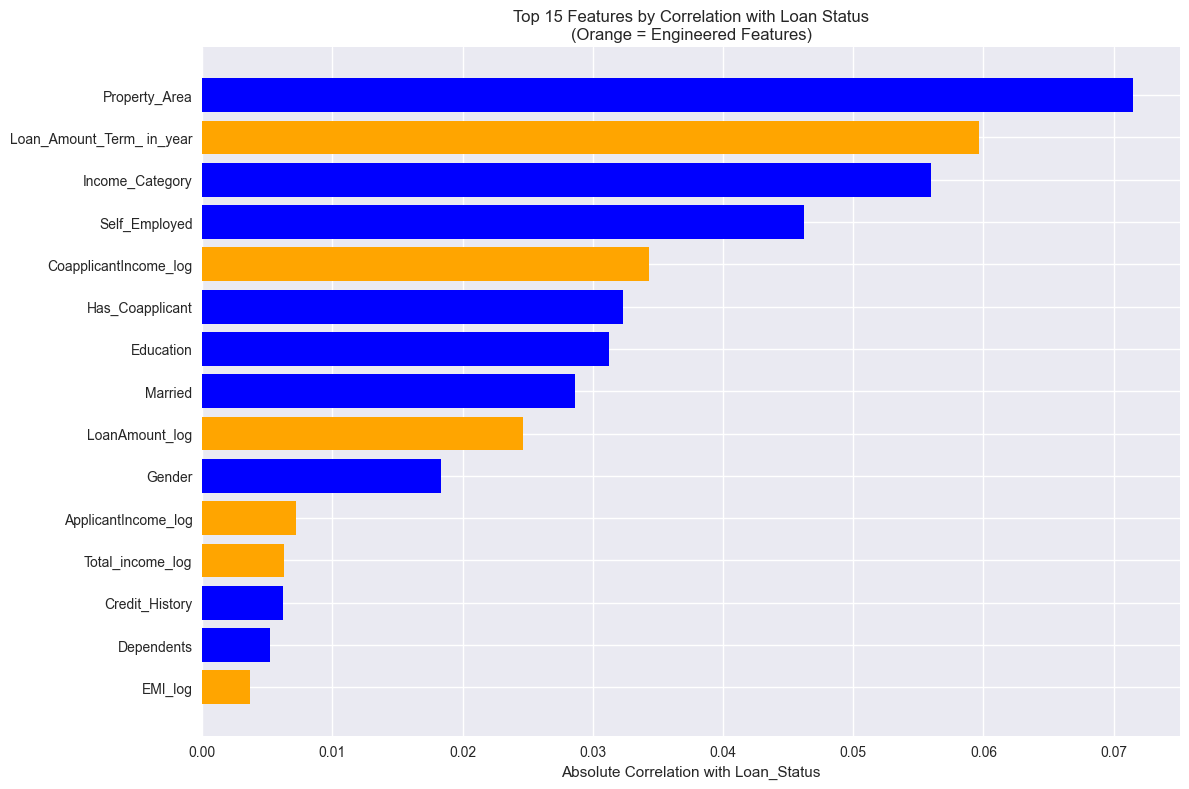


✓ Feature importance analysis completed
✓ 3 engineered features in top 10


In [28]:
# Feature importance analysis to validate EDA-based engineering
print("===FEATURE IMPORTANCE ANALYSIS===")
# Calculate correlation with target for all features
features_corr = scaled_X_train.corrwith(y_train).abs().sort_values(ascending=False)
print("Top 10 features by correlation with Loan Status")
for i, (feature, corr) in enumerate(features_corr.head(10).items(), 1):
    print(f"{i:2d}. {feature}: {corr:.3f}")
# Check if engineered features are among top features
engineered_features = [col for col in scaled_X_train.columns if any(keyword in col.lower() for keyword in ['year', 'total', 'log'])]
print(f"\nEngineered features in top 10: {[f for f in engineered_features if f in features_corr.head(10).index]}")
# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = features_corr.head(15)
colors = ['orange' if any(keyword in f.lower() for keyword in ['year', 'total', 'log']) else 'blue' for f in top_features.index]
plt.barh(range(len(top_features)), top_features.values, color=colors)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Absolute Correlation with Loan_Status')
plt.title('Top 15 Features by Correlation with Loan Status\n(Orange = Engineered Features)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
print(f"\n✓ Feature importance analysis completed")
print(f"✓ {len([f for f in engineered_features if f in features_corr.head(10).index])} engineered features in top 10")



#### **10. Saved preprocess Data**

In [29]:
print("SAVING PREPROCESSED DATA ")

# Save scaled datasets
scaled_X_train.to_csv('scaled_X_train.csv', index=False)
scaled_X_test.to_csv('scaled_X_test.csv', index=False)

# Save target variables
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Save preprocessing objects
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'selected_features.pkl')

# Save feature importance
feature_importance_df = pd.DataFrame({
    'feature': features_corr.index,
    'correlation':features_corr.values
})
feature_importance_df.to_csv('feature_importance.csv', index=False)

# Save preprocessing summary
preprocessing_summary = {
    'original_shape': df_copy.shape,
    'final_shape': df.shape,
    'selected_features': X.columns.tolist(),
    'engineered_features': engineered_features,
    'train_samples': scaled_X_train.shape[0],
    'test_samples':scaled_X_test.shape[0],
    'scaling_method': 'RobustScaler',
    'outlier_treatment': 'Log Transformation',
    'log_transformed': ['ApplicantIncome','CoapplicantIncome','LoanAmount','Total_income','EMI']
}

import json
with open('preprocessing_summary.json', 'w') as f:
    json.dump(preprocessing_summary, f, indent=2)

print("- Preprocessed data saved successfully!")
print("\nFiles created:")
print("- scaled_X_train.csv, scaled_X_test.csv")
print("- y_train.csv, y_test.csv")
print("- scaler.pkl, selected_features.pkl")
print("- feature_importance.csv, preprocessing_summary.json")

SAVING PREPROCESSED DATA 
- Preprocessed data saved successfully!

Files created:
- scaled_X_train.csv, scaled_X_test.csv
- y_train.csv, y_test.csv
- scaler.pkl, selected_features.pkl
- feature_importance.csv, preprocessing_summary.json


#### **11. Preprocessing Summary**

In [30]:
# Final preprocessing summary
print(".....PREPROCESSING SUMMARY BASED ON EDA INSIGHTS.....")
print(f"Original dataset shape: {df_copy.shape}")
print(f"Final processed dataset shape: {df.shape}")
print(f"Selected features: {len(X)}")
print(f"Training samples: {scaled_X_train.shape[0]}")
print(f"Test samples: {scaled_X_test.shape[0]}")
print("\n.....PREPROCESSING STEPS COMPLETED (EDA-BASED).....")
print("> Data quality assessment (no missing values, no duplicated values)")
print("> Log-transformation of skewed variables ('ApplicantIncome','CoapplicantIncome','LoanAmount', 'Total_income', 'EMI')")
print("> Feature engineering based on EDA recommendations:")
print(" - Total_Income = ApplicantIncome + Coapplicantincome")
print("  - Loan_Amount_Term_Year = Loan_Amount_Term / 12")
print("  - EMI = Loan_amount / Loan_Amount_Term_year")
print("  - Has_Coapplicant = Yes or No")
print("  - Income_category = Low, Medium, High and Very High")
print("> Feature selection ('ApplicantIncome','CoapplicantIncome','LoanAmount', 'Total_income', 'EMI', 'Loan_Amount_Term')")
print("> SMOTE (Handles class imbalance)")
print("> RobustScaler applied (EDA recommendation)")
print("> Feature importance analysis (validates engineered features)")
print("> Data export (ready for modeling)")
print("\n.....EDA EVIDENCE IMPLEMENTED.....")
print("> Skewed variables log-transformed as recommended")
print("> Features have been engineered")
print(f"\n Preprocessing completed successfully!!!!!!")
print(".....Ready for modeling phase with EDA-informed preprocessing")

.....PREPROCESSING SUMMARY BASED ON EDA INSIGHTS.....
Original dataset shape: (614, 12)
Final processed dataset shape: (614, 22)
Selected features: 844
Training samples: 675
Test samples: 169

.....PREPROCESSING STEPS COMPLETED (EDA-BASED).....
> Data quality assessment (no missing values, no duplicated values)
> Log-transformation of skewed variables ('ApplicantIncome','CoapplicantIncome','LoanAmount', 'Total_income', 'EMI')
> Feature engineering based on EDA recommendations:
 - Total_Income = ApplicantIncome + Coapplicantincome
  - Loan_Amount_Term_Year = Loan_Amount_Term / 12
  - EMI = Loan_amount / Loan_Amount_Term_year
  - Has_Coapplicant = Yes or No
  - Income_category = Low, Medium, High and Very High
> Feature selection ('ApplicantIncome','CoapplicantIncome','LoanAmount', 'Total_income', 'EMI', 'Loan_Amount_Term')
> SMOTE (Handles class imbalance)
> RobustScaler applied (EDA recommendation)
> Feature importance analysis (validates engineered features)
> Data export (ready for m